Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.




The wine quality dataset typically includes several key features that are used to predict the quality of wine. Here are the main features and their importance:

Fixed Acidity: This refers to the non-volatile acids in wine, such as tartaric acid. It contributes to the wine’s tartness and stability.

Volatile Acidity: This measures the amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste. It’s crucial for detecting spoilage.

Citric Acid: A minor component in wines, it can add freshness and flavor. Its presence can enhance the perception of acidity.

Residual Sugar: This is the amount of sugar remaining after fermentation stops. It affects the sweetness of the wine and can influence the balance and body.

Chlorides: This measures the salt content in wine. High levels can give a salty taste, which is generally undesirable.

Free Sulfur Dioxide: This is the amount of SO2 that is not bound to other molecules in the wine and acts as an antimicrobial and antioxidant.

Total Sulfur Dioxide: This includes both free and bound forms of SO2. It helps in preserving the wine and preventing oxidation.

Density: This is related to the sugar content and alcohol level in the wine. It can indicate the wine’s body and mouthfeel.

pH: This measures the acidity or alkalinity of the wine. It affects the taste, color, and stability of the wine.

Sulphates: These act as a wine preservative and can contribute to the wine’s aroma and flavor.

Alcohol: This is the ethanol content in wine. Higher alcohol levels can enhance the body and warmth of the wine.

Each of these features plays a significant role in determining the overall quality of the wine. For instance, alcohol content and volatile acidity are often found to be strong predictors of wine quality12. By analyzing these features, machine learning models can accurately predict the quality of wine, aiding in quality control and production processes


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

# Display the first few rows of the dataset
print(data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
# Basic statistics of the dataset
print(data.describe())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
# Check for missing values
print(data.isnull().sum())



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


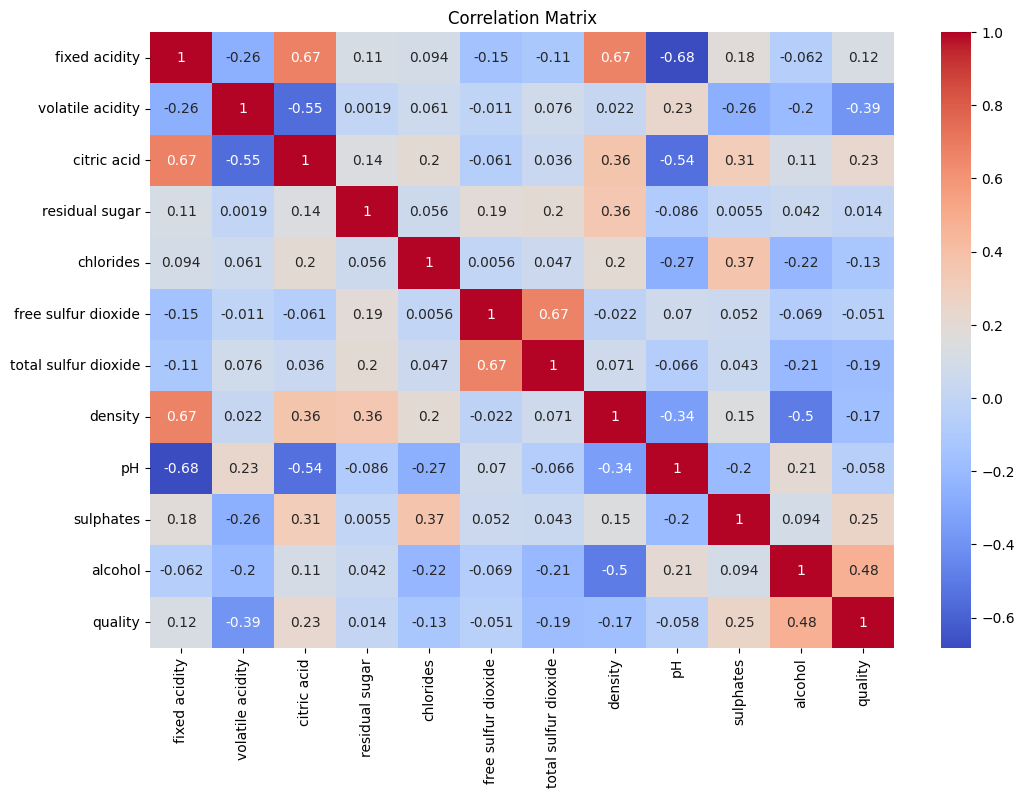

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [8]:
# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [11]:
# Make predictions
y_pred = model.predict(X_test)



In [12]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 98 31  1  0]
 [ 0  1 31 91  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In the wine quality dataset, handling missing data is a crucial step in the feature engineering process. Although the dataset we used earlier doesn’t have missing values, it’s important to know how to handle them if they were present. Here are some common imputation techniques and their advantages and disadvantages:

#1. Removing Rows with Missing Values
*Advantages:*
Simple and easy to implement.

Ensures that only complete data is used for analysis.

Disadvantages:
Can lead to significant data loss, especially if many rows have missing values.

May introduce bias if the missing data is not random.

#2 .Mean/Median/Mode Imputation
Advantages:
Simple and quick to implement.
Preserves the dataset size.

Disadvantages:
Can distort the distribution of the data.
May not be suitable for data with a high variance or skewed distribution.

#3 . Forward/Backward Fill
Advantages:
Useful for time-series data where the previous or next value can be a reasonable estimate.
Preserves the dataset size.

Disadvantages:
Can introduce bias if the data has trends or seasonality.
Not suitable for non-time-series data.

#4.K-Nearest Neighbors (KNN) Imputation
Advantages:
Takes into account the similarity between data points.
Can provide more accurate imputation for complex datasets.
Disadvantages:
Computationally expensive, especially for large datasets.
Sensitive to the choice of ( k ) and distance metric.

#5.Multivariate Imputation by Chained Equations (MICE)
Advantages:
Accounts for the relationships between multiple variables.
Can provide more accurate and robust imputation.
Disadvantages:
Computationally intensive.
Requires careful tuning and validation.

#6. Using Machine Learning Models
Advantages:
Can capture complex patterns in the data.
Provides more accurate imputation for datasets with intricate relationships.
Disadvantages:
Requires training a model, which can be time-consuming.
May overfit if not properly validated.



Choosing the right imputation technique depends on the nature of your data and the specific problem you’re trying to solve. Simple methods like mean imputation are quick and easy but may not always be the best choice for complex datasets. Advanced methods like KNN or MICE can provide more accurate results but require more computational resources and careful tuning.



In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

# Introduce some missing values for demonstration
data.iloc[0:10, 0] = np.nan

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print(data_imputed.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       8.321963              0.70         0.00             1.9      0.076   
1       8.321963              0.88         0.00             2.6      0.098   
2       8.321963              0.76         0.04             2.3      0.092   
3       8.321963              0.28         0.56             1.9      0.075   
4       8.321963              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

Several key factors can influence students' performance in exams. These factors can be broadly categorized into academic and non-academic factors:

### Key Factors Affecting Students' Performance
1. **Academic Factors**:
   - **Study Effort**: The amount of time and effort students put into studying and preparing for exams¹.
   - **Previous Academic Achievement**: Past performance can often predict future success⁵.
   - **Study Skills**: Effective study techniques and habits⁴.
   - **Test Preparation**: How well students prepare for specific types of exams².

2. **Non-Academic Factors**:
   - **Test Anxiety**: High levels of anxiety can negatively impact performance¹.
   - **Motivation**: Students' goals and motivation levels can significantly affect their performance¹.
   - **Language Skills**: Proficiency in the language of instruction¹.
   - **Family Background**: Support and educational background of the family⁵.
   - **Personal Characteristics**: Traits such as resilience, self-discipline, and time management⁵.

### Analyzing These Factors Using Statistical Techniques
To analyze these factors, you can follow these steps:

1. **Data Collection**:
   - Gather data on students' exam scores and potential influencing factors (e.g., study hours, anxiety levels, previous grades, etc.).

2. **Descriptive Statistics**:
   - Use descriptive statistics to summarize the data. This includes measures like mean, median, standard deviation, and frequency distributions.

3. **Correlation Analysis**:
   - Perform correlation analysis to identify relationships between different factors and exam performance. For example, you can use Pearson's correlation coefficient to measure the strength and direction of the relationship between study hours and exam scores.

4. **Regression Analysis**:
   - Use multiple regression analysis to determine the impact of several independent variables (e.g., study hours, test anxiety, motivation) on the dependent variable (exam performance). This helps in understanding the relative importance of each factor.

5. **Hypothesis Testing**:
   - Conduct hypothesis tests (e.g., t-tests, ANOVA) to compare the performance of different groups (e.g., students with high vs. low anxiety) and determine if the differences are statistically significant.

6. **Factor Analysis**:
   - Use factor analysis to identify underlying variables (factors) that explain the pattern of correlations within a set of observed variables. This can help in reducing the number of variables and identifying key factors.

7. **Visualization**:
   - Create visualizations such as scatter plots, histograms, and box plots to explore the data and identify patterns or outliers.




In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [15]:
# Sample data: Student performance, study hours, and attendance
data = {
    'Study_Hours': [5, 8, 6, 9, 7, 10, 4, 6, 8, 7],
    'Attendance': [90, 85, 88, 92, 80, 95, 70, 85, 90, 80],
    'Exam_Score': [78, 85, 80, 90, 75, 92, 65, 80, 88, 78]
}


In [16]:
# Create a DataFrame
df = pd.DataFrame(data)

In [17]:
# Define the independent variables (X) and dependent variable (y)
X = df[['Study_Hours', 'Attendance']]
y = df['Exam_Score']

In [18]:
# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     88.89
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.06e-05
Time:                        17:43:06   Log-Likelihood:                -18.116
No. Observations:                  10   AIC:                             42.23
Df Residuals:                       7   BIC:                             43.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.9069      7.649      1.818      

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [19]:
# Plotting
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Study Hours vs Exam Score')

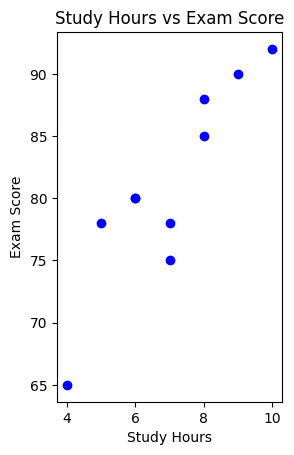

In [20]:
# Plot Study Hours vs Exam Score
plt.subplot(1, 2, 1)
plt.scatter(df['Study_Hours'], df['Exam_Score'], color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')


Text(0.5, 1.0, 'Attendance vs Exam Score')

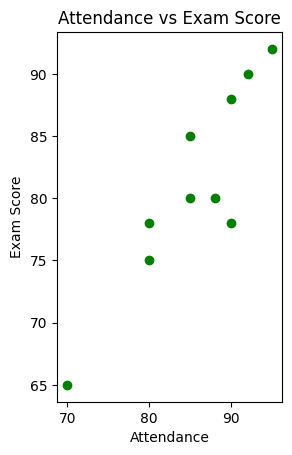

In [21]:
# Plot Attendance vs Exam Score
plt.subplot(1, 2, 2)
plt.scatter(df['Attendance'], df['Exam_Score'], color='green')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')

In [22]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

Example: Structural Equation Modeling (SEM) with Python


In [26]:
# Import necessary libraries
import pandas as pd
from semopy import Model

# Sample data
data = {
    'Study_Hours': [5, 8, 6, 9, 7, 10, 4, 6, 8, 7],
    'Attendance': [90, 85, 88, 92, 80, 95, 70, 85, 90, 80],
    'Exam_Score': [78, 85, 80, 90, 75, 92, 65, 80, 88, 78]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the SEM model
model_desc = """
# Measurement model
Exam_Score ~ Study_Hours + Attendance
"""

# Initialize and fit the model
model = Model(model_desc)
model.fit(df)

# Print the results
results = model.inspect()
print(results)


         lval  op         rval  Estimate  Std. Err   z-value       p-value
0  Exam_Score   ~  Study_Hours  2.325261  0.366285  6.348221  2.178195e-10
1  Exam_Score   ~   Attendance  0.595551  0.091524  6.507066  7.663270e-11
2  Exam_Score  ~~   Exam_Score  2.192991  0.980735  2.236068  2.534732e-02


In [24]:
pip install semopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 8.8 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659681 sha256=8df760a58758462d8c450c9f842c2558437077474861c87bb24a6a009bb0673d
  Stored in directory: /root/.cache/pip/wheels/53/ec/0d/0b294c02d8c4e9e80afea58839f2c1b4706770594bc99ec045
Successfully built semopy


In [25]:
python sem_analysis.py


SyntaxError: invalid syntax (<ipython-input-25-5f59b309c84c>, line 1)

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Feature engineering is a crucial step in data preprocessing, where you create new features or transform existing ones to improve the performance of machine learning models. In the context of a student performance dataset, feature engineering can help uncover hidden patterns, improve model accuracy, and provide deeper insights into the factors affecting student performance. Here's a detailed description of the process:

### 1. **Understand the Data**

Before starting feature engineering, understand the dataset thoroughly:
- **Identify Existing Features**: What features are available? For example, study hours, attendance, previous exam scores.
- **Understand Data Types**: Identify categorical, numerical, and ordinal data types.
- **Explore Relationships**: Look for initial patterns and relationships between features and the target variable (e.g., exam score).

### 2. **Feature Creation**

Create new features that may help improve the predictive power of your models:

- **Aggregate Features**: Combine existing features to create new ones. For example:
  - **Total Study Time**: If you have study hours for different subjects, create a total study time feature.
  - **Attendance Percentage**: If attendance is recorded in different terms, aggregate it to get an overall attendance percentage.

- **Interaction Features**: Create features that capture interactions between existing features:
  - **Study Hours × Attendance**: The interaction between study hours and attendance might reveal more about performance.

- **Polynomial Features**: Create polynomial features if you suspect non-linear relationships:
  - **Squared Study Hours**: Add a squared term to capture non-linear effects.

- **Temporal Features**: If you have time-related data, create features based on time:
  - **Time Since Last Exam**: If exam dates are available, calculate the time since the last exam.

### 3. **Feature Transformation**

Transform features to improve model performance:

- **Normalization/Standardization**: Scale numerical features to a similar range or distribution.
  - **Standardization**: Convert features to have a mean of 0 and a standard deviation of 1.
  - **Normalization**: Scale features to a range, e.g., 0 to 1.

- **Encoding Categorical Features**: Convert categorical variables into numerical values:
  - **One-Hot Encoding**: Create binary columns for each category.
  - **Label Encoding**: Assign integer values to categories.

- **Binning**: Convert continuous variables into categorical bins:
  - **Grade Binning**: Convert exam scores into grade categories (e.g., A, B, C).

### 4. **Feature Selection**

Select the most relevant features to include in your model:

- **Correlation Analysis**: Remove features that are highly correlated with each other to avoid multicollinearity.
- **Feature Importance**: Use algorithms like Random Forest to identify the most important features.
- **Statistical Tests**: Apply tests like Chi-Square or ANOVA to evaluate feature relevance.

### 5. **Handling Missing Values**

Address missing values to ensure they don't negatively impact model performance:

- **Imputation**: Replace missing values with statistical measures (mean, median) or predictive models.
- **Feature Engineering for Missingness**: Create a binary feature indicating the presence of missing values.

### 6. **Feature Extraction**

Extract features from complex data types:

- **Text Data**: Convert text data (e.g., student feedback) into numerical features using techniques like TF-IDF or word embeddings.
- **Time-Series Data**: Extract features like trends, seasonality, and anomalies from time-series data if available.

### Example: Feature Engineering in Python

Here’s an example using Python and `pandas` for feature engineering on a student performance dataset:

`



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Sample data
data = {
    'Study_Hours': [5, 8, 6, 9, 7, 10, 4, 6, 8, 7],
    'Attendance': [90, 85, 88, 92, 80, 95, 70, 85, 90, 80],
    'Previous_Scores': [75, 80, 78, 85, 70, 88, 65, 77, 82, 74],
    'Gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Feature Engineering
# Create interaction feature
df['Study_Attendance_Interaction'] = df['Study_Hours'] * df['Attendance']

# Create polynomial feature
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['Study_Hours']])
df[['Study_Hours_Squared']] = poly_features[:, 1]

# Binning
df['Score_Category'] = pd.cut(df['Previous_Scores'], bins=[0, 70, 80, 90, 100], labels=['Poor', 'Average', 'Good', 'Excellent'])

# Encoding categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[['Gender']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names(['Gender']))

# Combine features
df = pd.concat([df, encoded_df], axis=1).drop(['Gender'], axis=1)

# Normalization
scaler = StandardScaler()
df[['Study_Hours', 'Attendance', 'Previous_Scores', 'Study_Attendance_Interaction', 'Study_Hours_Squared']] = scaler.fit_transform(df[['Study_Hours', 'Attendance', 'Previous_Scores', 'Study_Attendance_Interaction', 'Study_Hours_Squared']])

print(df)



1.1. Box Plot
Description: A graphical representation of the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.
Outliers: Typically defined as points that fall below
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR or above
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR, where IQR is the interquartile range.

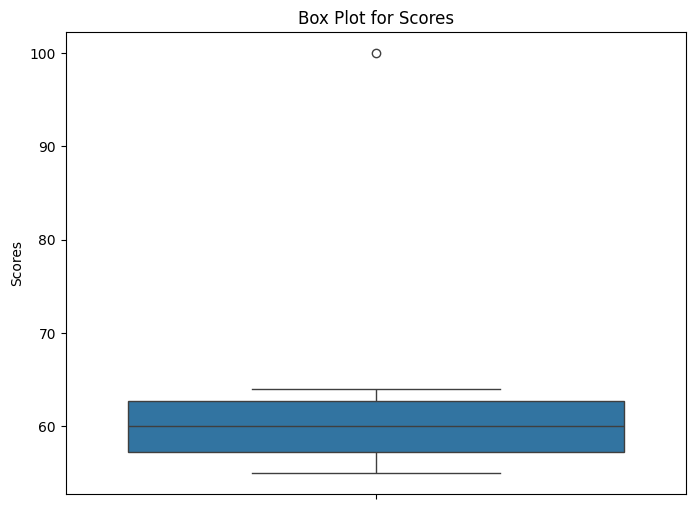

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Scores': [55, 56, 57, 58, 59, 100, 61, 62, 63, 64]
}
df = pd.DataFrame(data)

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(df['Scores'])
plt.title('Box Plot for Scores')
plt.show()


1.2. Scatter Plot
Description: Useful for detecting outliers in bivariate data by visualizing the relationship between two variables.

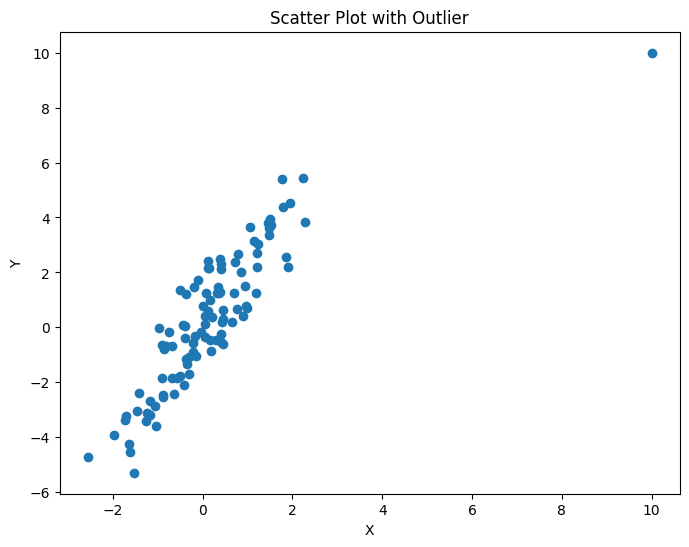

In [36]:
import numpy as np

# Sample data
np.random.seed(0)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 1, 100)

# Adding an outlier
x = np.append(x, [10])
y = np.append(y, [10])

plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Scatter Plot with Outlier')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

#1. Load the Wine Quality Dataset
First, you'll need to load the wine quality dataset. For this example, I'll assume you're using the popular winequality-red.csv file, which contains the red wine dataset. You can load it using pandas in Python:



In [37]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/winequality-red (1).csv')


In [38]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


2. Overview of the Data


In [39]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#3. Distribution of Each Feature
To visualize the distribution of each feature, use histograms and box plots. This helps in understanding the shape and spread of the data.

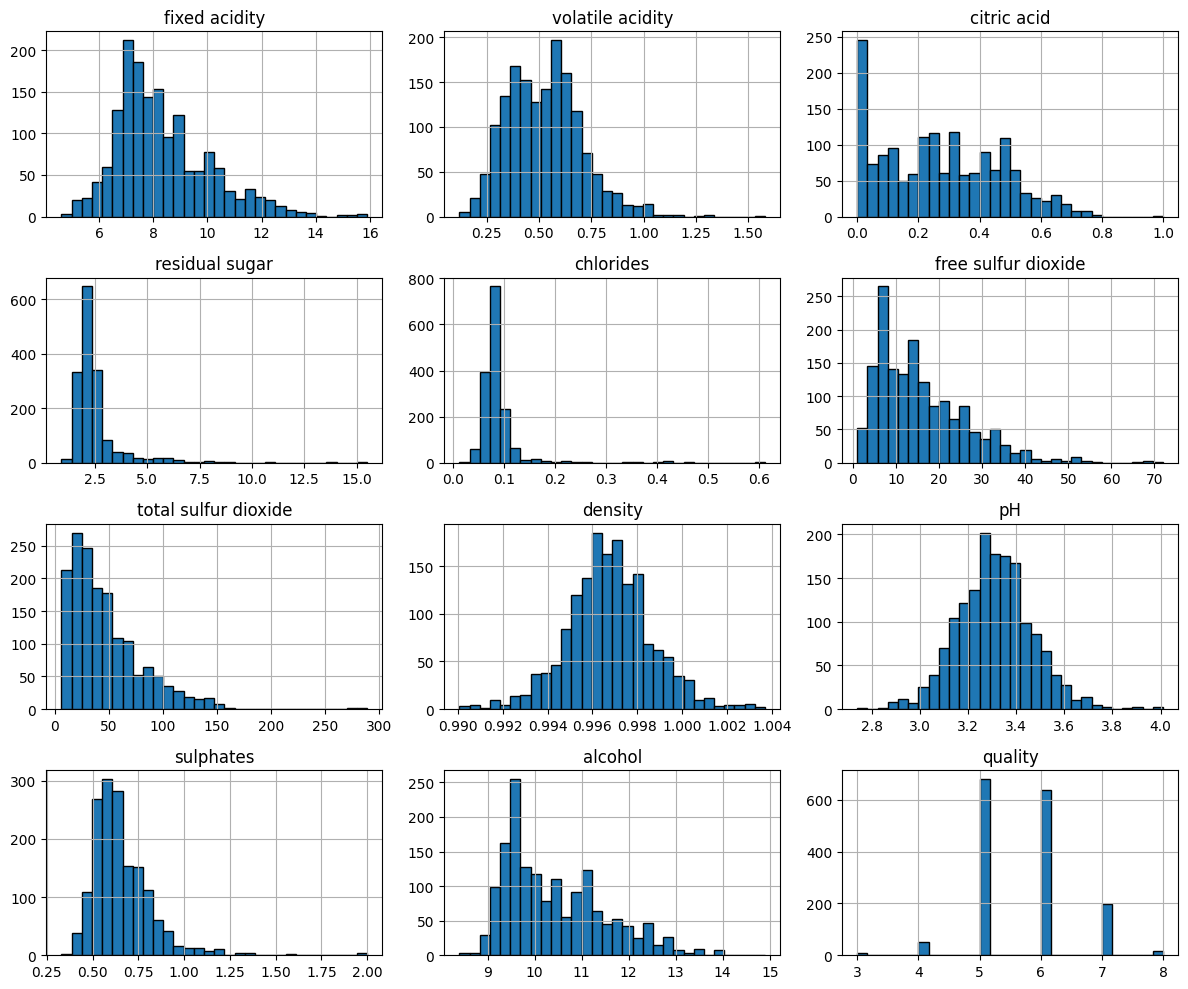

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()


Alternatively, use seaborn for a more aesthetically pleasing visualization:



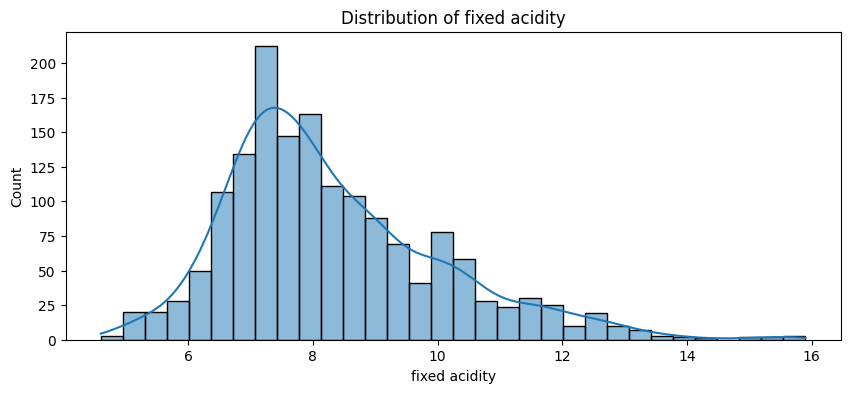

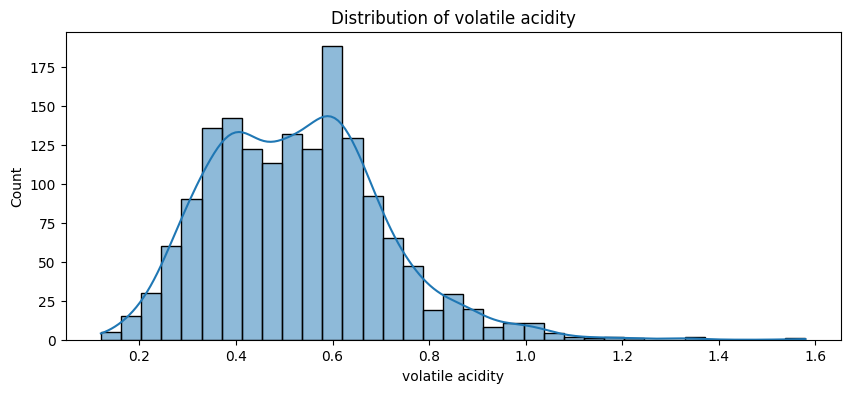

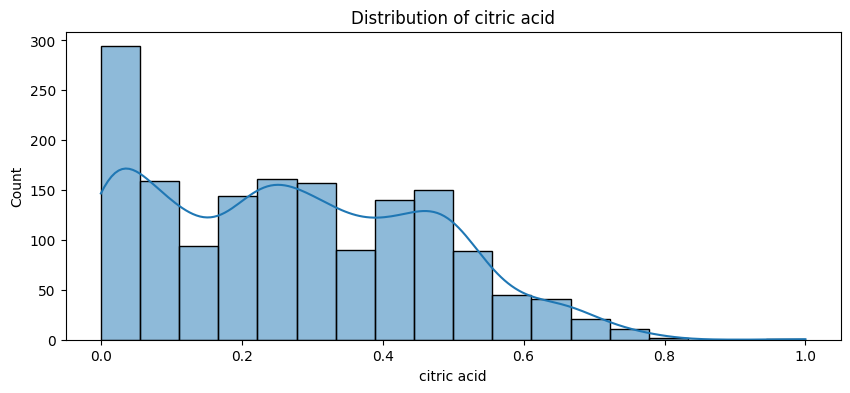

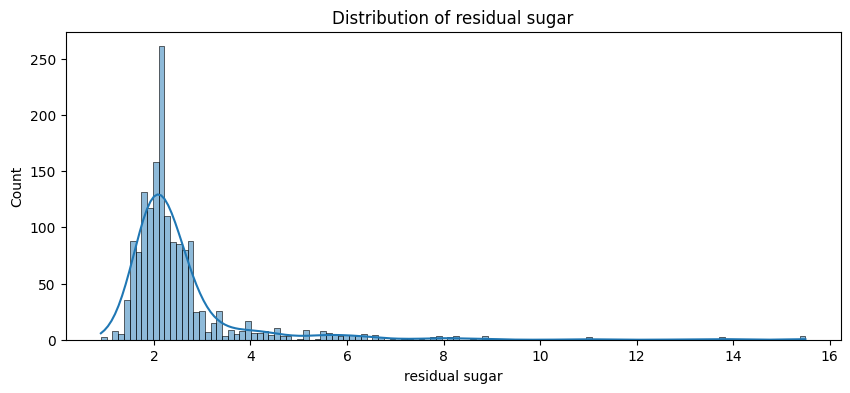

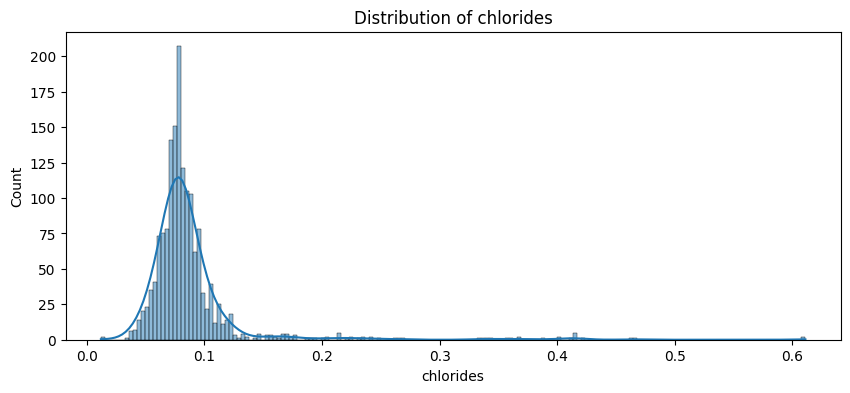

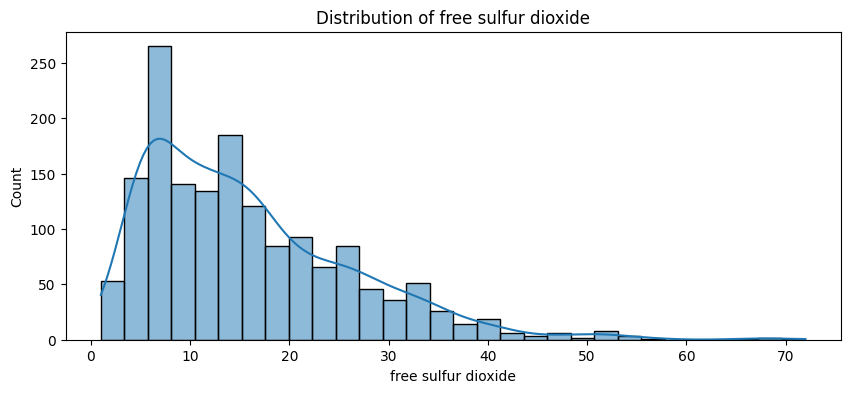

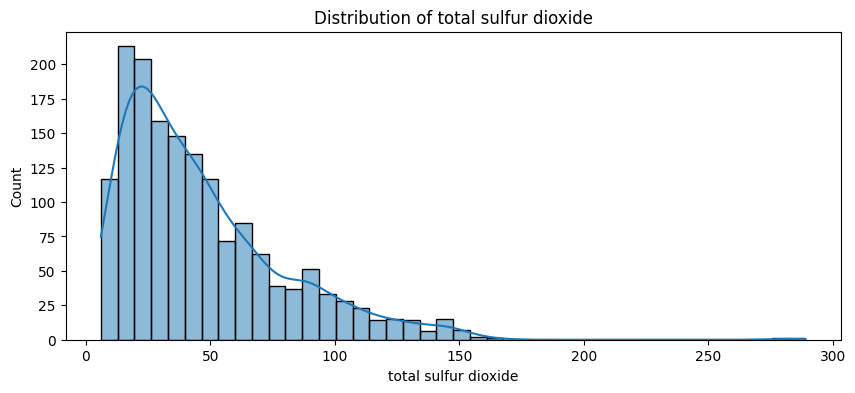

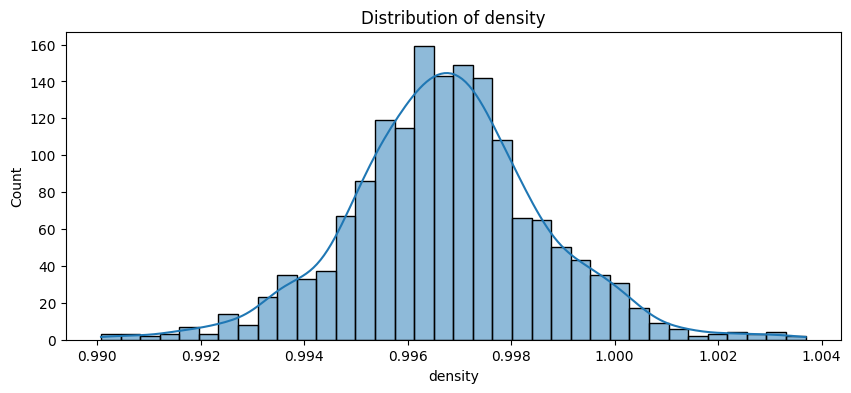

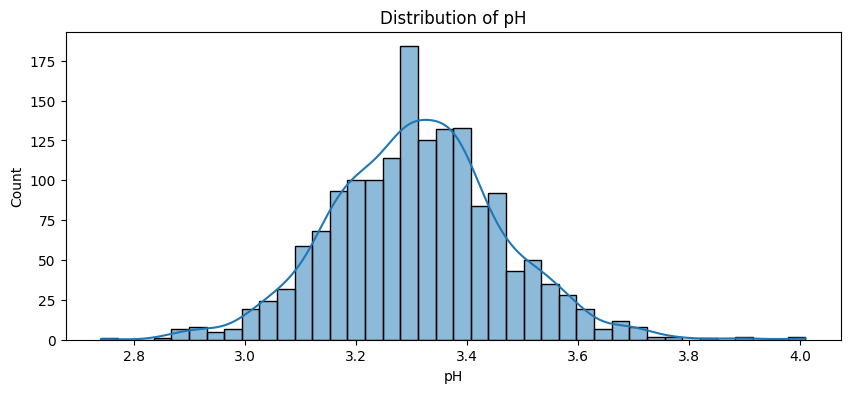

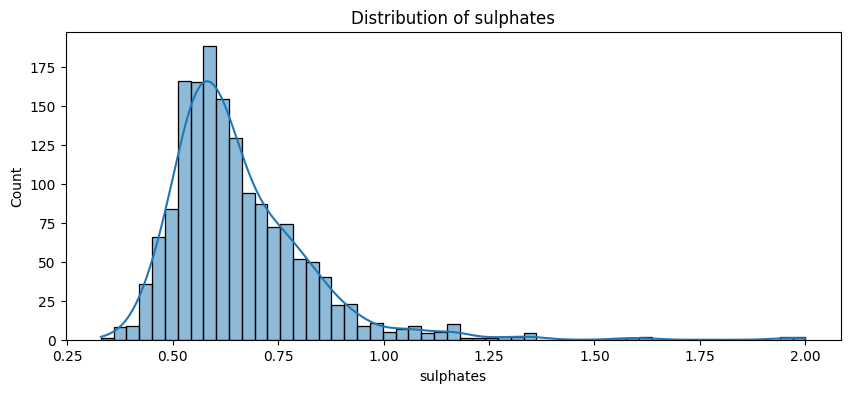

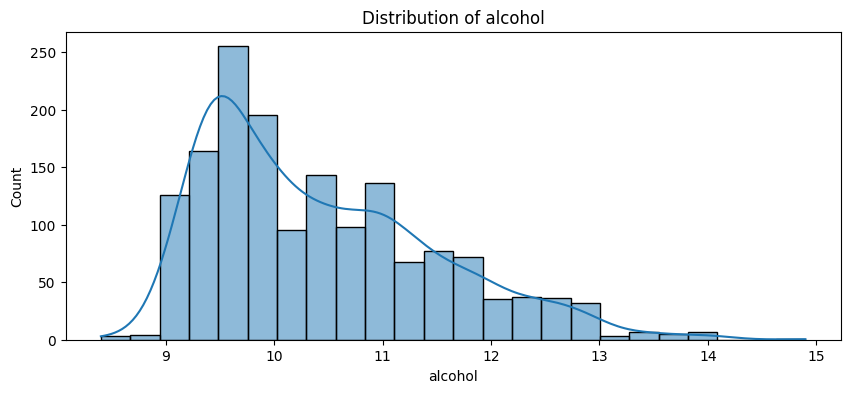

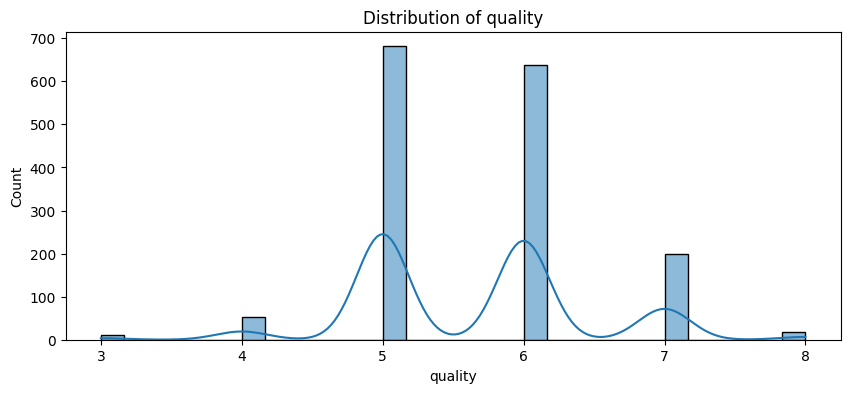

In [41]:
# Plot distribution for each feature using seaborn
for feature in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


4. Check for Normality
To assess normality, you can use visual inspections like Q-Q plots and statistical tests such as the Shapiro-Wilk test.



Q-Q Plot


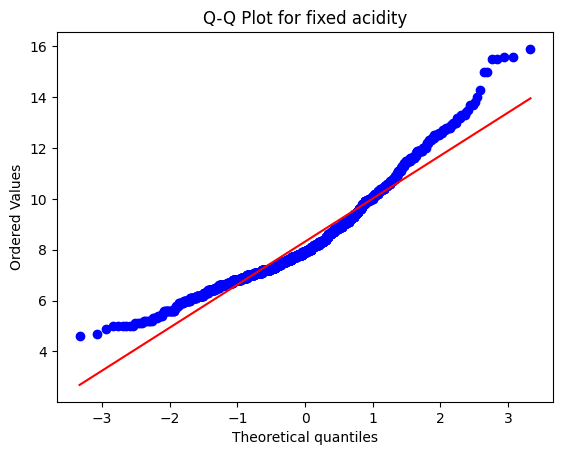

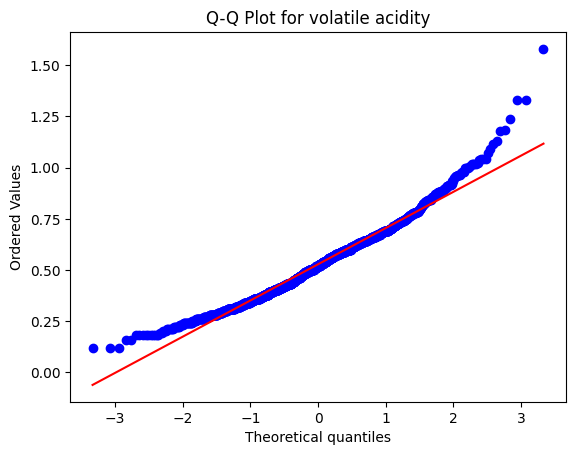

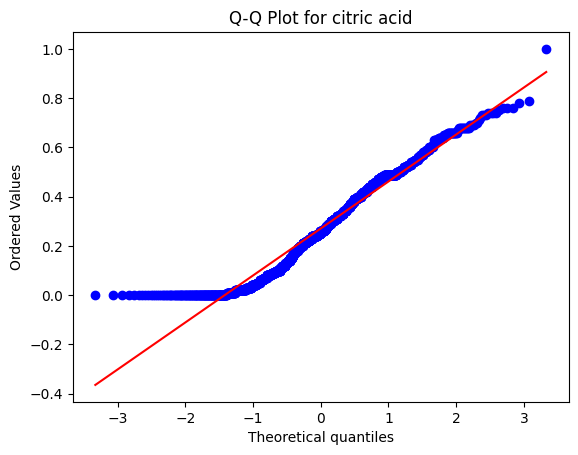

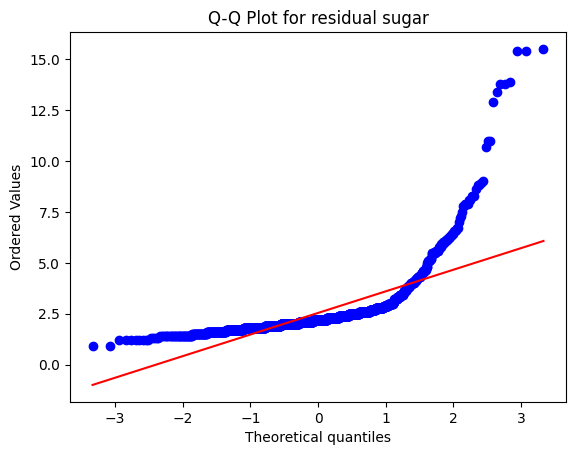

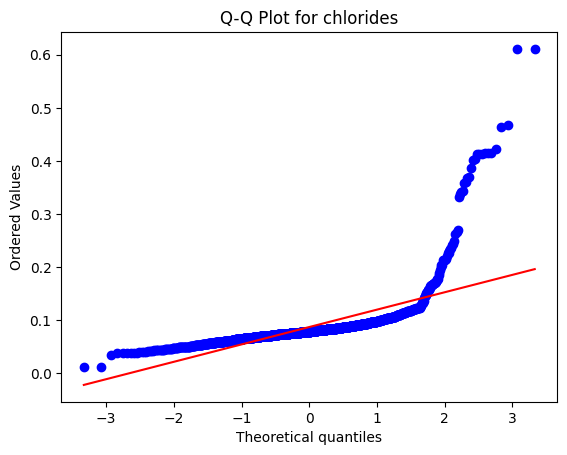

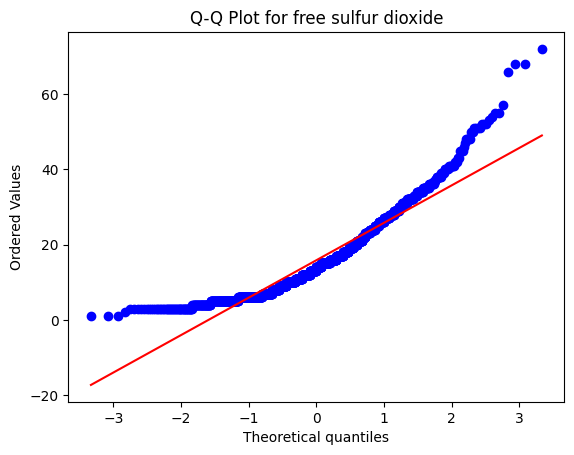

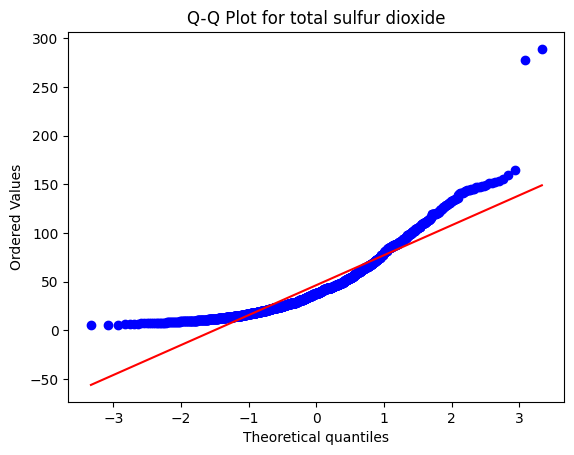

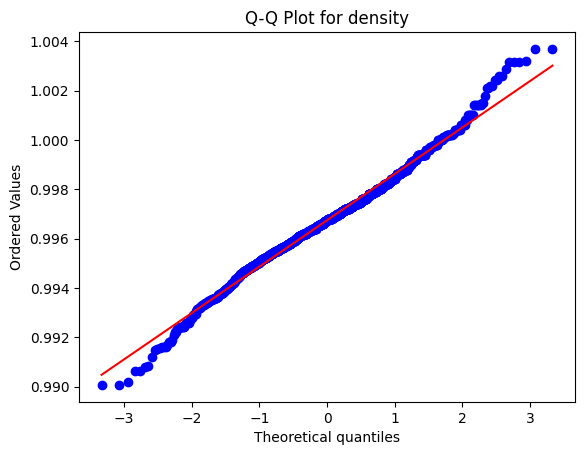

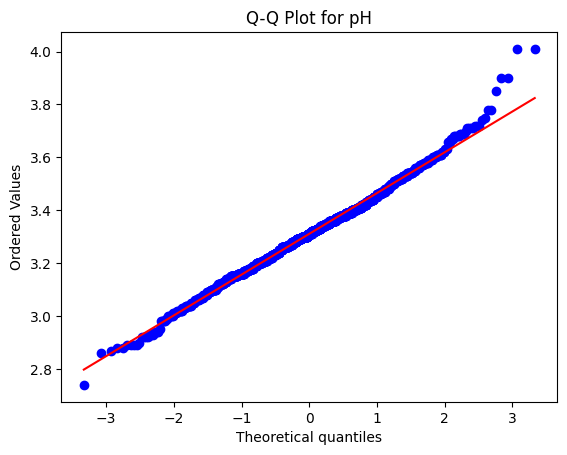

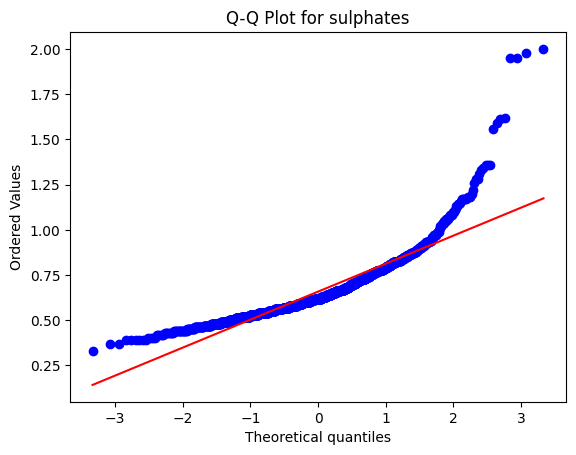

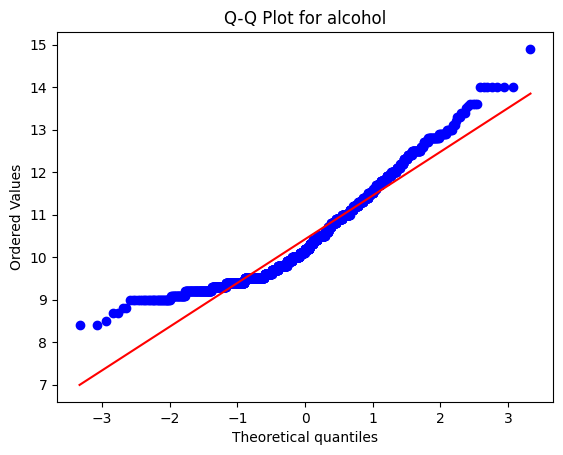

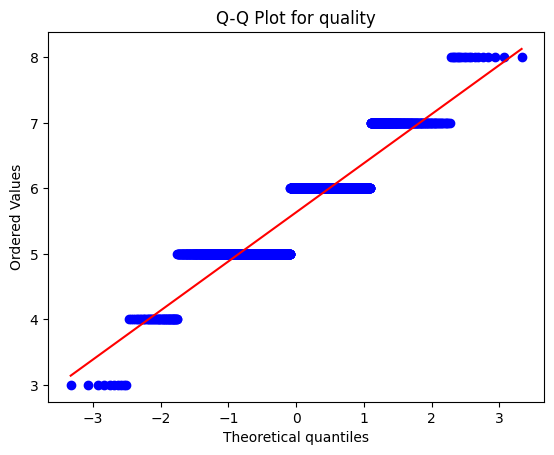

In [42]:
import scipy.stats as stats

# Q-Q plot for a specific feature
def qq_plot(feature):
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()

for feature in df.columns:
    qq_plot(feature)


In [43]:
#Shapiro-Wilk Test
# Perform Shapiro-Wilk test for each feature
for feature in df.columns:
    stat, p = stats.shapiro(df[feature])
    print(f'{feature}: Statistics={stat:.3f}, p={p:.3f}')


fixed acidity: Statistics=0.942, p=0.000
volatile acidity: Statistics=0.974, p=0.000
citric acid: Statistics=0.955, p=0.000
residual sugar: Statistics=0.566, p=0.000
chlorides: Statistics=0.484, p=0.000
free sulfur dioxide: Statistics=0.902, p=0.000
total sulfur dioxide: Statistics=0.873, p=0.000
density: Statistics=0.991, p=0.000
pH: Statistics=0.993, p=0.000
sulphates: Statistics=0.833, p=0.000
alcohol: Statistics=0.929, p=0.000
quality: Statistics=0.858, p=0.000


A p-value less than 0.05 typically indicates non-normality.



Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

Number of principal components to explain 90% variance: 7


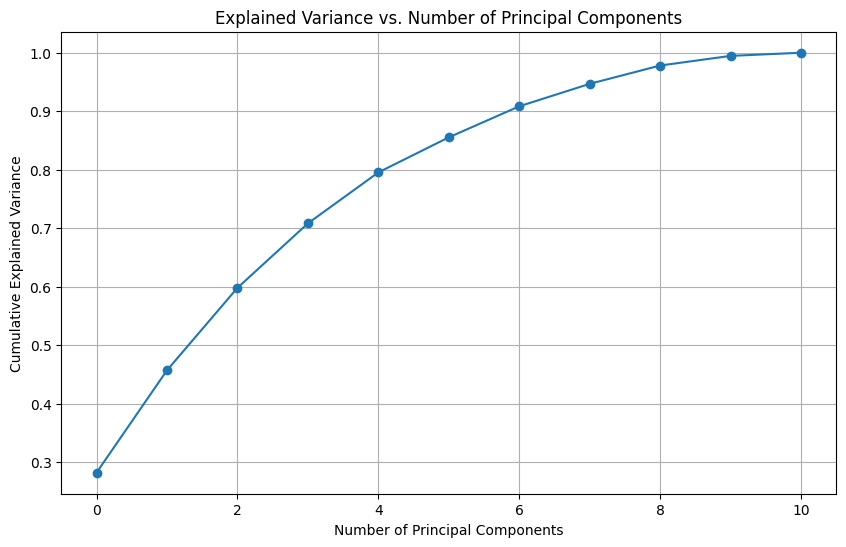

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the wine quality data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Standardize the data
features = data.drop('quality', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca.fit(scaled_features)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the number of components that explain at least 90% of the variance
num_components = (cumulative_variance >= 0.90).argmax() + 1

print(f"Number of principal components to explain 90% variance: {num_components}")

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()
